<h1 style='text-align:center'><b>Auto - MPG</b></h3>

## Table of Contents
* [Dataset](#dataset)
* [Libraries](#libraries)
* [Data Preparation](#datapreparation)
    * [Question 1. Data Type](#datatype)
    * [Question 2. Missing values](#missing)
    * [Question 3. Correlation and Scatterplot](#correlation)
* [Modeling](#modeling)
    * [Question 4. Multi-lineal regression model](#regression)
    * [Question 5. Linear regression Performance](#performance)
    
[Results](#results)

<a  id="dataset"><h2 id ='dataset'> <pd >DataSet</pd></h2></a>

Dataset: auto-mpg. There are 9 variables in the data:  

• **mpg:** miles per gallon - continuous  
• **cyl:** number of cylinders – multi-valued discrete  
• **disp:** engine displacement or engine size - continuous  
• **hp:** horsepower - continuous  
• **wt:** vehicle weight - continuous  
• **acc:** time taken to accelerate - continuous  
• **yr:** model year – multi-valued discrete  
• **origin:** multi-valued discrete  
• **car name:** car model name  

Dataset: UCI Machine Learning Repository  
Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg  
Your tasks are:
- Load the dataset in Python
- Load numpy, pandas, matplot, and seaborn packages
- Check and report on missing values

<a  id="libraries"><h2> <pd >Libraries</pd></h2></a>

In [55]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [56]:
# read dataframe
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original',header=None,delim_whitespace=True)

<div class="alert alert-block alert-warning">
<p style='text-align:center' >Before starting the analysis the attributes does not have appropriate name</p>

<a  id="datapreparation"><h2> <pd >Data Preparation</pd></h2></a>

In [57]:
# Assign columns names
df.columns=['mpg','cylinders','displacement','hp','weight','acceleration','year','origin','car_name']
df

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


<a  id="datatype"><h2> <pd >Question 1. Data Type</pd></h2></a>

After loading data as well as required packages, your tasks are to answer the following questions:
1. How to check type of a row/observation (numerical value, categorical, or missing)?

In [58]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
hp              float64
weight          float64
acceleration    float64
year            float64
origin          float64
car_name         object
dtype: object

<div class="alert alert-block alert-warning">
<p  >The all data type are consistent with the data its contains each attribute.

<a  id="missing"><h2> <pd >Question 2. Missing values</pd></h2></a>

2. Once missing values are identified, which function to use if using median value as a way to
fill in.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   hp            400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   year          406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [60]:
df.isna().sum()

mpg             8
cylinders       0
displacement    0
hp              6
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

<div class="alert alert-block alert-warning">
<p  >As all those float features that have 406 entries are complete , meaning there are no missing values,  it is important to note that due to the nature of the float data type, it can only accept numerical values or the special value "NaN" (Not a Number) to represent missing data. Therefore, if there are missing values in float features like <b>hp</b> and <b>mpg</b>, they will be represented as "NaN" in the dataset.</p>

Let's see the missing values from hp variable

In [61]:
df[df.hp.isna()]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin,car_name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


Let's see the missing values from mpg variable

In [62]:
df[df.mpg.isna()]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin,car_name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


<div class="alert alert-block alert-warning">
<p  >Even though the missing values in both features can be deleted as they represent less than <b>5%</b> of the data, deleting missing values should be last option. 

<div class="alert alert-block alert-info">
    <b>Feature mpg</b>
<p  >'mpg' are dependent variable should not be a good idea to replace the values with a value considering this is the feature that will be predicted. However, as the distribution is really close to be <b>normal distribution</b>, the missing values can be replaced with the <b>MEAN</b>.

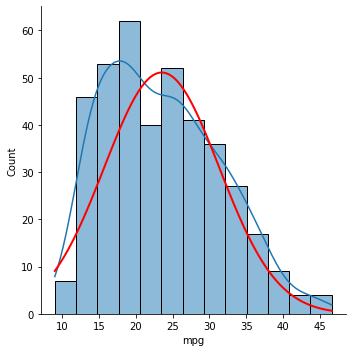

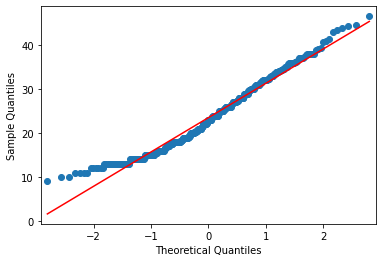

In [63]:
import statsmodels.api as sam
var=df.mpg
sns.displot(var,kde=True)
x = np.linspace(np.min(var), np.max(var), 100)
pdf = 1/(np.std(var) * np.sqrt(2 * np.pi)) * np.exp( - (x - np.mean(var))**2 / (2 * np.std(var)**2))
plt.plot(x, pdf*1000, 'r', linewidth=2)
plt.show()

fig=sam.qqplot(df.mpg[~df.mpg.isna()],line='s')

Also, for the coming prediction using linear regression. One of the assumptions  is that the dependent variable should be normaly distributed. This assumption is importnt because the assumptions of the underling statistical method used to estimate the regression coefficients. If the dependent variable is not normally distributed, the regression estimates may not be accurate and the standard errors of the estimates may be biased. Based on the previous graph we could approximate this distirbution as normal

In [64]:
df.mpg.median()

23.0

In [65]:
#replacement
df.mpg.fillna(df.mpg.mean(),inplace=True)

In [66]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
hp              6
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

Now, let do let check hp , what value would be the pertinent to replace the nulls

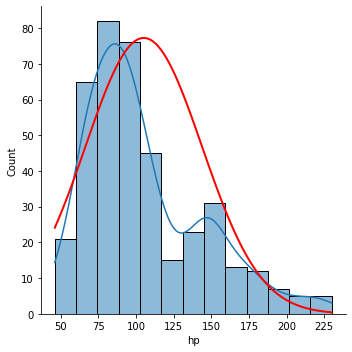

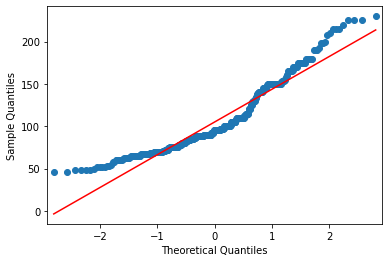

In [67]:
import statsmodels.api as sam
var=df.hp
sns.displot(var,kde=True)
x = np.linspace(np.min(var), np.max(var), 100)
pdf = 1/(np.std(var) * np.sqrt(2 * np.pi)) * np.exp( - (x - np.mean(var))**2 / (2 * np.std(var)**2))
plt.plot(x, pdf*7500, 'r', linewidth=2)
plt.show()

fig=sam.qqplot(df.hp[~df.hp.isna()],line='s')

<div class="alert alert-block alert-info">
    <b>Feature hp</b>
<p  >As the distribution of the <b>hp</b> hp variable in the mpg dataset deviates significantly from normality, it is recommended to use a measure of central tendency that is not sensitive to outliers, such as the <b>MEDIAN</b>, to replace missing values in the hp variable. This is because a measure of central tendency that is sensitive to outliers, such as the mean, could be affected by the non-normality of the distribution. Using the median would be a more robust method of handling missing values in this case.

In [68]:
#replacement
df.hp.fillna(df.hp.median(),inplace=True)

In [69]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
hp              0
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

Before continuing with the following question, the only categorical variable still have the data   type float. 

In [70]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
hp              float64
weight          float64
acceleration    float64
year            float64
origin          float64
car_name         object
dtype: object

In [71]:
df.origin=df.origin.astype('int')
df.origin=df.origin.astype('category')

In [72]:
df.dtypes

mpg              float64
cylinders        float64
displacement     float64
hp               float64
weight           float64
acceleration     float64
year             float64
origin          category
car_name          object
dtype: object

<a  id="correlation"><h2> <pd >Question 3. Correlation and Scatter Plot</pd></h2></a>

3. Identify important features using correlation tests and scatter plots

### Numerical Variables

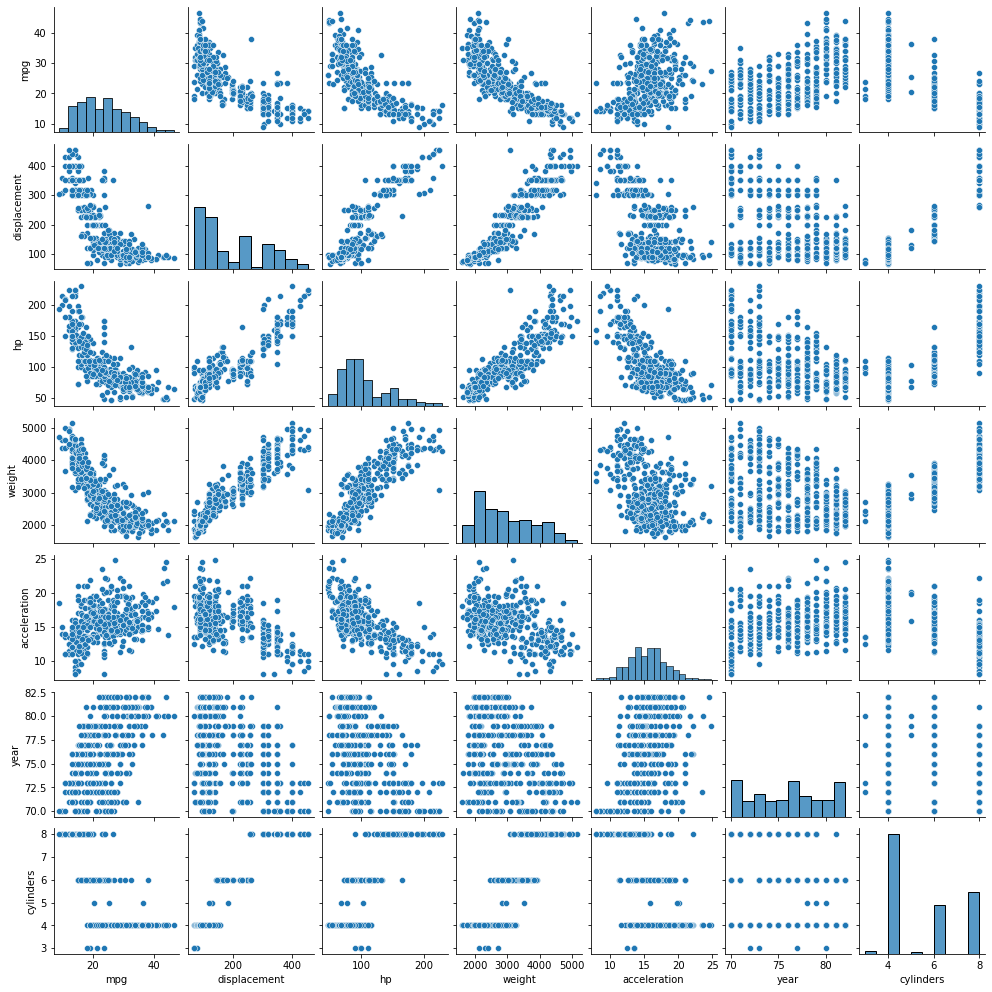

In [73]:
#scatterplot
numerical=['mpg','displacement','hp','weight','acceleration','year','cylinders']
sns.pairplot(df[numerical], height= 2.0)
plt.show()

### Categorical Variable

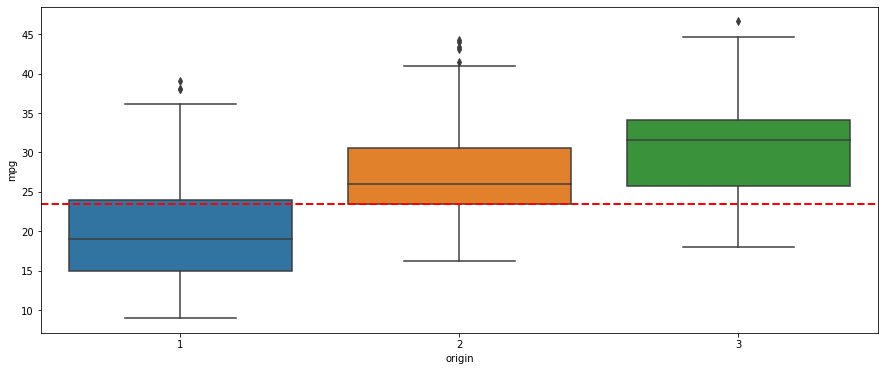

In [74]:
var = 'origin'
data_plt = pd.concat([df['mpg'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
#fig.axis(ymin=0, ymax=1)
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [75]:
def correlation_tests_and_scatter_plots(df, dependent_var):
    from scipy.stats import chisquare
    d={}
    independent_vars = [col for col in df.columns if col != dependent_var and col in numerical]
    for col in independent_vars:
        corr, p_value = pearsonr(df[col], df[dependent_var])
        print(f'Person Correlation between {col} and {dependent_var}: {corr} with pvalue of {p_value}')
        d[col]=[corr,p_value]
    return pd.DataFrame(d).transpose().rename(columns={0:'Pearson Corr',1:'p_value'})


In [76]:
corr=correlation_tests_and_scatter_plots(df,'mpg')

Person Correlation between cylinders and mpg: -0.7626979902421127 with pvalue of 1.7955024088161892e-78
Person Correlation between displacement and mpg: -0.7912679547932493 with pvalue of 2.4828870111073473e-88
Person Correlation between hp and mpg: -0.7599282511800738 with pvalue of 1.3671140041000175e-77
Person Correlation between weight and mpg: -0.8233271954182654 with pvalue of 2.019912322355896e-101
Person Correlation between acceleration and mpg: 0.4093381866887993 with pvalue of 7.812099402390884e-18
Person Correlation between year and mpg: 0.565698040963714 with pvalue of 1.0200248497911607e-35


In [77]:
corr

,Pearson Corr,p_value
cylinders,-0.762698,1.795502e-78
displacement,-0.791268,2.482887e-88
hp,-0.759928,1.367114e-77
weight,-0.823327,2.019912e-101
acceleration,0.409338,7.812099e-18
year,0.565698,1.020025e-35


<a  id="modeling"><h2> <pd >Modeling</pd></h2></a>

<a  id="regression"><h2> <pd >Question 4. Linear regression model</pd></h2></a>

Establish a linear regression model and interpret the results of the regression model. Note that split the dataset into 2 using a ratio of 80:20 as for training and testing sets. Train the regression model on training set.

In [78]:
columns_df=['origin'] #dummies variables

In [79]:
df_dummies=pd.get_dummies(df.iloc[:,:-1],columns=columns_df,drop_first=True)#,prefix_sep=pre,drop_first=True) 

df_dummies

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin_2,origin_3
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,0,0
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,0,0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,1,0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,0,0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,0,0


In [94]:
df_train,df_test= train_test_split(df_dummies, test_size = 0.20, random_state = 0 )
print(df_train.shape)
print(df_test.shape)

(324, 9)
(82, 9)


In [95]:
formula = 'mpg ~ cylinders + displacement + hp + weight + acceleration + year + origin_2 + origin_3'
print('formula: ',formula)
model_all = sm.ols(formula = formula, data = df_train)
fitted = model_all.fit()
print('\n')
print(fitted.summary())


formula:  mpg ~ cylinders + displacement + hp + weight + acceleration + year + origin_2 + origin_3


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          7.76e-107
Time:                        16:42:46   Log-Likelihood:                -850.06
No. Observations:                 324   AIC:                             1718.
Df Residuals:                     315   BIC:                             1752.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [96]:
df.mpg.min()

9.0

In [97]:
df.mpg.max()

46.6

<div class="alert alert-block alert-info">
    <b>Regression Results interpretation</b>
    <li><b>Intercept:</b>As this is the baseline value of the 'mpg' when none of the independent variables are present. This value does not make sense since there is  the real world this number cannot be negative. However, in real world also does not makes sense the independent variables in zero. <p>This reminds us that not predicting the 'mpg' when the independent variables are outside the range of values used in the training data set.</p><p>This variables is signinficant as the p value is less than 0.05 (level of significance).</p><p>Also, based on the range of value of the variable 'mpg' (9 - 46.6) a value of -11.9 is has significant impact on the model's predictions, especially when the independent variables are close to zero. </p></li>
    <br>
    <li><b>Insignificant variables:</b> The variables  <b>cylinders</b> , <b>hp</b> and <b>acceleration</b> are the variables with p-values greater than 0.05 (level of significance), from how the model is set up this values refer they are not statistically significant in predicting 'mpg'. However,  Considering that miles per gallon is a measure of how much fuel a vehicle burn in comparison to the distance covered, does not make sense that  <b>cylinders</b> , <b>hp</b> and <b>acceleration</b> are not significant to predict 'mpg' , and  their  association is  to random chance.
        <p> This could be happening due to the variables are correlated with other variables in the model, it may not add any additional information to the model, and thus their presence in the model does not have a significant impact on 'mpg'.</p></li>

<a  id="performance"><h2> <pd >Question 5. Linear regression Performance </pd></h2></a>

Check the performance of the regression on the test set, using RMSE and MAE indicators.
Make a conclusion on the performance of the model.

<div class="alert alert-block alert-info">
The iteration methods in OLS can be used to test various combinations, however, the decision to include or exclude variables will be based on a data visualization analysis that considers metrics such as MSEA, MAE, p-value, and R-squared.

In [98]:
y_train=df_train[['mpg']]
x_train=df_train.iloc[:,1:]
y_test=df_test[['mpg']]
x_test=df_test.iloc[:,1:]

In [99]:
def metrics():
    #predict the test set results
    y_pred_test = fitted.predict(x_test)
    y_pred_train = fitted.predict(x_train)
    #metrics
    print()
    print("{} predictors".format(len(f.split('+'))))
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)


    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    return pd.DataFrame({'Test Metrics':[rmse_test,mae_test,r2_test],'Train Metrics':[rmse_train,mae_train,r2_train]},index=['RMSE','MAE','R2'])

####  fit 1: main effects

In [100]:
f='mpg ~ cylinders + displacement + hp + weight + acceleration + year + origin_2 + origin_3 '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
print(fitted.summary())

metrics()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     162.1
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          7.76e-107
Time:                        16:42:48   Log-Likelihood:                -850.06
No. Observations:                 324   AIC:                             1718.
Df Residuals:                     315   BIC:                             1752.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.4551      5.195     -2.397   

,Test Metrics,Train Metrics
RMSE,4.032408,3.335736
MAE,2.936418,2.545268
R2,0.770112,0.804542


<div class="alert alert-block alert-danger">
<p >Based on the <b>RMSE</b>, <b>MAE</b>, and <b>R-squared</b> values obtained from your multilinear regression:</p>
    <li>As  <b>RMSE</b> is a measure of standard deviation of residuals, the value of 3.42 is is a measure of spread of the prediction from the actual values. A lower RMSE value indicates a better fit of the model to the data.</li>
    <li><b>MAE</b>value of 2.56 indicates that the model's predictions are on average 2.57 units away from the actual values.</li>
    <li><b>R-squared</b> explains 77.9% of the variance in the dependent variable.</li>
    <br>
    <br>
    <br>
    <b>The model could be improved by using more features, or by using a more complex model, in order to get a better fit and better predictions.</b>

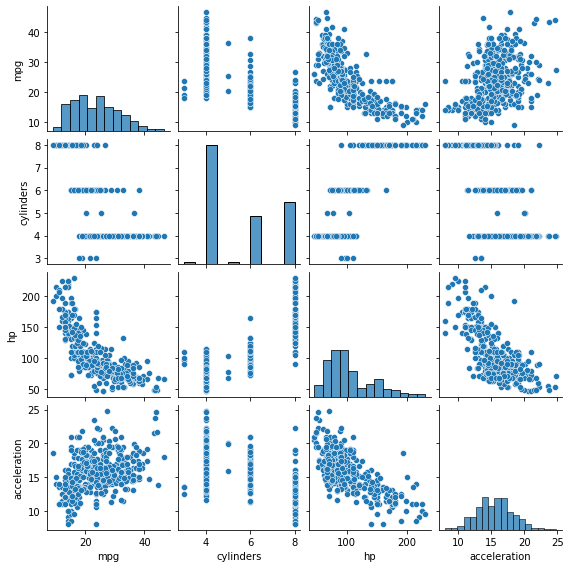

In [101]:
sns.pairplot(df[['mpg','cylinders' , 'hp' ,'acceleration']], height= 2.0)

In [102]:
df[['mpg','cylinders' , 'hp' ,'acceleration']].corr()

,mpg,cylinders,hp,acceleration
mpg,1.000000,-0.762698,-0.759928,0.409338
cylinders,-0.762698,1.000000,0.842307,-0.522452
hp,-0.759928,0.842307,1.000000,-0.694415
acceleration,0.409338,-0.522452,-0.694415,1.000000


<div class="alert alert-block alert-warning">
Due to the high correlation between <b>hp</b>  and <b>cylinders</b> high p-values of the variables may result from multicollinearity. This issue can be addressed by either removing one of the variables or including their interaction, and both options will be considered.
     <p  >this can be fixed : either deleting one variable or including their interaction. Both will be evaluated. </p  > 

#### Deleting cylinders

In [103]:
f='mpg ~ displacement + hp + weight + acceleration + year + origin_2 + origin_3'
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


7 predictors


,Test Metrics,Train Metrics
RMSE,4.036378,3.343678
MAE,2.943662,2.552070
R2,0.769659,0.803610


In [104]:
f='mpg ~ displacement + hp + weight + acceleration + year + origin_2 + origin_3'
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


7 predictors


,Test Metrics,Train Metrics
RMSE,4.036378,3.343678
MAE,2.943662,2.552070
R2,0.769659,0.803610


#### Deleting hp

In [105]:
f='mpg ~ cylinders + displacement +  weight + acceleration + year + origin_2 + origin_3'
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


7 predictors


,Test Metrics,Train Metrics
RMSE,4.012871,3.349154
MAE,2.897197,2.546504
R2,0.772335,0.802966


<div class="alert alert-block alert-warning">
<p  >There is not significant difference of metrics either deleting <b>hp</b> or <b>cylinders</b></p  >
    <p  >Next step: Consider interactions in the model with  <b>hp</b> or <b>cylinders</b></p  >


####  fit 2: Interactions cylinders and hp

In [106]:
f=' mpg ~ cylinders + displacement + hp + weight + acceleration + year + origin_2 + origin_3 + I(cylinders*hp) '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
print(fitted.summary())
metrics()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     195.1
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          6.63e-123
Time:                        16:42:51   Log-Likelihood:                -809.03
No. Observations:                 324   AIC:                             1638.
Df Residuals:                     314   BIC:                             1676.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.5684      5.39

,Test Metrics,Train Metrics
RMSE,3.918452,2.939001
MAE,2.654342,2.164131
R2,0.782922,0.848270


<div class="alert alert-block alert-warning">
<li><b>Significant variables:</b> Now, The variables  <b>cylinders</b> and <b>hp</b> are significant <i>(less than 0.05 (level of significance))</i>.</li>
   <li> <b>Insignificant variables:</b> On the other hand, though the association of <b>displacement</b>  is 91% due to random chance, this does not mean there is  not association at all. Maybe, their linear association is not significant, but logaritmic. So the next step is create two cases deleting this variaible (fit 3) and evaluating  polynomial effects of this variable (fit 4).
        
<p>Regarding <b>accelation:</b> even though its p-value is sighltly higher than 0.05. As p-value is only a guide and it is near after the treshold,  the variable can be considered significant. </p>
      


####  fit 3: Deleting displacement

In [107]:
f=' mpg ~ cylinders +  hp + weight + acceleration + year + origin_2 + origin_3 + I(cylinders*hp) '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
print(fitted.summary())
metrics()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     220.1
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          4.54e-124
Time:                        16:42:51   Log-Likelihood:                -809.08
No. Observations:                 324   AIC:                             1636.
Df Residuals:                     315   BIC:                             1670.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.3061      5.32

,Test Metrics,Train Metrics
RMSE,3.913090,2.939462
MAE,2.655763,2.163424
R2,0.783516,0.848223


<div class="alert alert-block alert-warning">
All metrics keeped constaint.
 <p> 
    Given that <b>displacement</b>is almost entirely associated with the variable weight and has a high likelihood of being approximated by non-linear behaviour, it manifests as a troublesome variable. To decrease the likelihood of multicollinearity, it is also advised to rule out this variable as the metrics remains constant.
    </p>      


####  fit 4: Polynomial effect and interaction

As the 'mpg' and some variables( **displacement**,  **hp** and  **weight**) not only demonstrated linear correlation but also logarithmic, so this polynomial interaction will be evaluated.


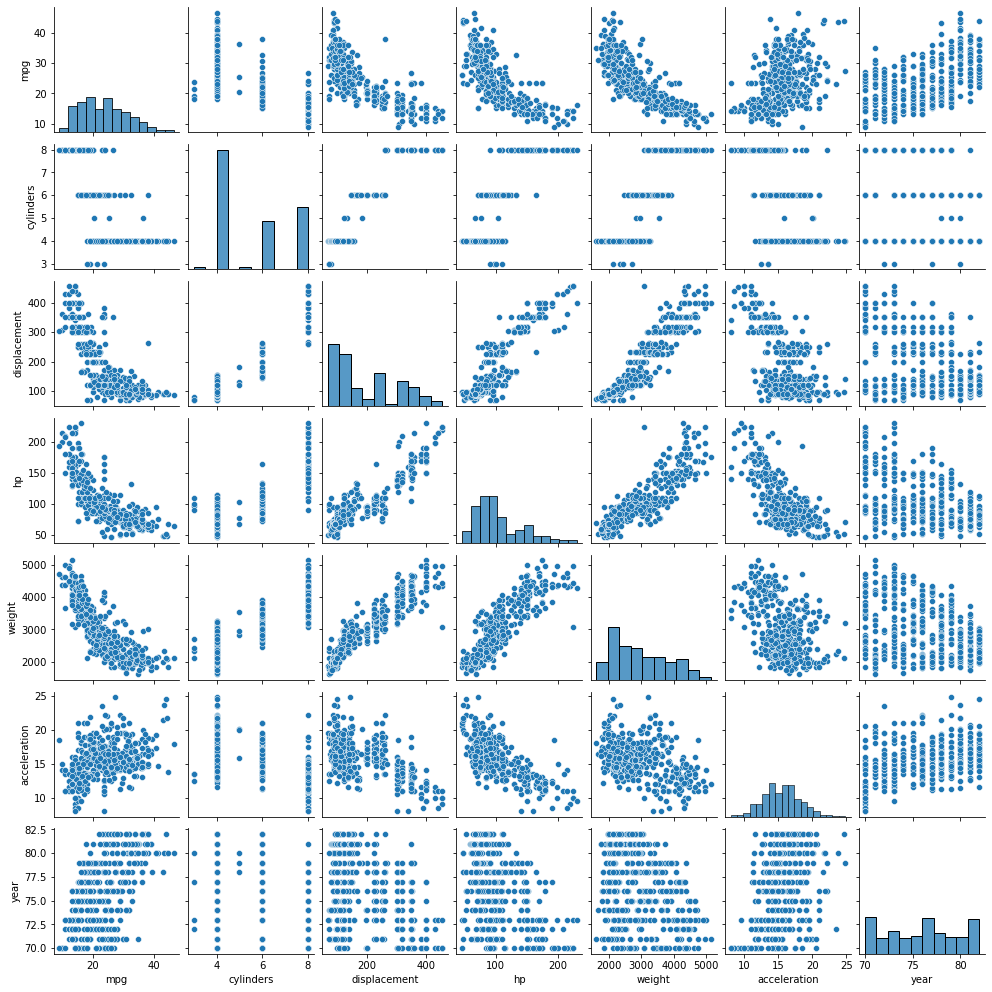

In [108]:
sns.pairplot(df, height= 2.0)

In [109]:
df[['mpg','displacement','hp','weight']].corr()

,mpg,displacement,hp,weight
mpg,1.000000,-0.791268,-0.759928,-0.823327
displacement,-0.791268,1.000000,0.896703,0.932475
hp,-0.759928,0.896703,1.000000,0.864369
weight,-0.823327,0.932475,0.864369,1.000000


<div class="alert alert-block alert-warning">
The previous graph reveals that only 'hp' and 'weight' show non-linear correlation with the dependent variable. But, the correlation table indicates high linear correlation between these variables, which could lead to multicollinearity issues.
    

  <p> let's evaluate the  polynomial  interactions between <b>hp</b>  and <b>weight</b> if they  can be included in the model. </p>   

In [110]:
f=' mpg ~ cylinders + hp + weight + acceleration + year + origin_2 + origin_3 + I(cylinders*hp) + I(weight**2) + I(hp**2)'
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
print(fitted.summary())
metrics()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 17 Mar 2023   Prob (F-statistic):          1.05e-124
Time:                        16:42:57   Log-Likelihood:                -801.95
No. Observations:                 324   AIC:                             1626.
Df Residuals:                     313   BIC:                             1667.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.1359      5.27

,Test Metrics,Train Metrics
RMSE,4.005284,2.875468
MAE,2.743696,2.119437
R2,0.773195,0.854759


<div class="alert alert-block alert-warning">
 <p>Including   <b>hp</b>  and <b>weight</b> interactions shown insignificant response into depedent variable 'mpg', its coefficient are almost cero. The impact of these variables on the dependent variable is mainly described by linear behavior. So... </p>   
    <br>
   <p> <b>Polynomial interactions discarted</b> </p>   

<a  id="results"><h2> <pd >Results </pd></h2></a>

Let's compare the results of some evaluated combinations.

In [111]:
#fit1
f=' mpg ~ cylinders + displacement + hp + weight + acceleration + year + origin_2 + origin_3 '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


8 predictors


,Test Metrics,Train Metrics
RMSE,4.032408,3.335736
MAE,2.936418,2.545268
R2,0.770112,0.804542


In [112]:
#fit2
f=' mpg ~ cylinders + displacement + hp + weight + acceleration + year + origin_2 + origin_3 + I(cylinders*hp)  '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


9 predictors


,Test Metrics,Train Metrics
RMSE,3.918452,2.939001
MAE,2.654342,2.164131
R2,0.782922,0.848270


In [113]:
#fit3
f=' mpg ~ cylinders +  hp + weight + acceleration + year + origin_2 + origin_3 + I(cylinders*hp)  '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


8 predictors


,Test Metrics,Train Metrics
RMSE,3.913090,2.939462
MAE,2.655763,2.163424
R2,0.783516,0.848223


In [114]:
#fit 4
f=' mpg ~ cylinders + hp + weight + acceleration + year + origin_2 + origin_3 + I(cylinders*hp) + I(weight**2) + I(hp**2)  '
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


10 predictors


,Test Metrics,Train Metrics
RMSE,4.005284,2.875468
MAE,2.743696,2.119437
R2,0.773195,0.854759


<div class="alert alert-block alert-info">
<li><b>fit 1:</b> It is the least flexible, low R-square. The results for training and test dataset are pretty similar.</li>
     <li><b>fit 2:</b>It is the best model, this models represents 82% of the values predicted. It presented the least RMSE, MAE and higher R-square, which is a good sign of a good fit of a model </li>
    <li><b>fit 3:</b> Though removing 'displacement  'did not change the metrics, we reduced the multicollinearity chance.</li>
    
   <li><b>fit 4:</b> It is the most flexible, good R-square, but contain innecessary predictors that are not significant enough to predict any interaction with 'mpg'</li>
  
<b>fit 3:</b>
The RMSE and MAE  are both relatively low, indicating that the model is making accurate predictions. The R2 (coefficient of determination) is also high, indicating that the model is a good fit for the data.

In general, it seems that this multilineal model is a good fit for the data and is making accurate predictions. The model is not overfitting to the training data and is performing well on the test set.

###  Multicollinearity

Multicolinearity is a phenomenon that occurs when two or more independent variables in a multilinear regression model are highly correlated with each other. This means that they are measuring the same or similar underlying construct, and thus they are providing redundant information to the model.
From the  fit 2, next step to reduce the multicollinearity will be developed.

In [115]:
f='mpg ~ cylinders +  hp + weight +  year + origin_2 + origin_3 + I(cylinders*hp)'
model_all = sm.ols(formula = f, data = df_train)
fitted = model_all.fit()
metrics()


7 predictors


,Test Metrics,Train Metrics
RMSE,3.898594,2.965370
MAE,2.633591,2.204634
R2,0.785117,0.845535


<div class="alert alert-block alert-info">
In the analysis of the fit_3 model, it was determined that the p-value of the 'acceleration' variable was slightly above 0.05. To minimize the possibility of multicollinearity, the best model was selected and this variable was excluded. The results showed that this change had a minimal effect on the RMSE, MAE, and R2, indicating that the 'acceleration' variable was not a significant contributor to the model. This demonstrates the importance of thoroughly reviewing the p-values of variables in a multiple linear regression model to prevent multicollinearity and ensure the use of the most accurate model for predictions.

In [116]:
#for the following analysis is important that....
print('The max value of mpg in the training data is {}, meanwhile the min is {}. The range of the value is {}'.format(df_train.mpg.max(),df_train.mpg.min(),46.6-9))

The max value of mpg in the training data is 44.6, meanwhile the min is 9.0. The range of the value is 37.6


<div class="alert alert-block alert-info">
<b>Based on the RMSE, MAE, and R-squared values obtained in the final model selected (fit3_final)from your multilinear regression:</b>

<li>As RMSE is a measure of standard deviation of residuals, the value of 3.07 is is a measure of spread of the prediction from the actual values. A lower RMSE value indicates a better fit of the model to the data.</li>
<li>MAEvalue of 2.26 indicates that the model's predictions are on average 2.26 units away from the actual values.
R-squared explains <b>82.2%</b> of the variance in the dependent variable.</li>

<b>Regression Results interpretation</b>
<li><b>Intercept:</b>The intercept value does not make sense for practical purposes, as it represents the "mpg" when all independent variables are at zero, which is not a feasible scenario in the real world. <i>This reminds us:  not predict  'mpg' using this model when the independent variables are outside the range of values used in the training data set.</i>
    <br>
 <li><b>cylinders:</b> The model shows that as the number of cylinders in a vehicle increases, the miles per gallon decreases by 3.5919. This indicates that for <b> <i>every unit increase in the number of cylinders, the miles per gallon decreases by 3.5919 the value of 'mpg'</i></b> when the rest of variables keep constant, which represents a 9% decrease in the range of possible values for miles per gallon in the training dataset. This finding is consistent with the expected relationship between the number of cylinders and miles per gallon. The more cylinders an engine has, the more power it can generate for acceleration. This explains why the variable "acceleration" was not significant in the model, as it is correlated with the number of cylinders. The data shows that when vehicles have more power to accelerate, they consume more energy and this results in lower fuel efficiency and fewer miles per gallon.</li>  <u> This variable was the most influencial in all over the predictors.</u>
<br>
     
 <li><b>hp:</b> The model shows that as horsepower in a vehicle is higher, the miles per gallon decreases by 0.255. This indicates that for <b> <i>every unit increase in the horsepower, the miles per gallon decreases by 0.255 the value of 'mpg'</i></b> when the rest of variables keep constant. Generally, vehicles with higher horsepower tend to have lower fuel efficiency and fewer miles per gallon compared to vehicles with lower horsepower. This is because vehicles with higher horsepower require more energy to generate more power, which results in higher fuel consumption. However, the constant show really low value due to every increase of hp the mpg decrease only 0.67% in the range of possible values for miles per gallon in the training dataset.</li>
    
<br>
    
 <li><b>weight:</b> The model shows that as weight in a vehicle is higher, the miles per gallon decreases by 0.005. This indicates that for <b> <i>every unit increase in the weight, the miles per gallon decreases by 0.005 the value of 'mpg'</i></b> when the rest of variables keep constant. The decreasement was expected, as the heavier vehicles require more energy to move, which means that they consume more fuel, which results in higher fuel consumption. However, the value is really low due to every increase of hp the mpg decrease only 0.01% in the range of possible values for miles per gallon in the training dataset.</li>
    
<br>
    
 <li><b>year:</b> The model shows that as the times goes on, the vehicules are more eficient by an increasement of 0.72 mpg. This indicates that for <b> <i>every year, the miles per gallon increase by 0.72 the value of 'mpg'</i></b> when the rest of variables keep constant. The mpg increase only 1.9% in the range of possible values for miles per gallon in the training dataset.</li>

    
<br>
    
 <li><b>origin_2:</b> Based on the results the origin 2 is more efficient against origin 1 by 1.73. </li>
      <br>
    
 <li><b>origin_3:</b> Based on the results the origin 3 is more efficient against origin 1 by 2.4. </li>   
    <br>
 <li><b>cylinders and hp interaction :</b> The interaction between the number of cylinders and horsepower leads to a decrease of 0.0354 units in "mpg". Despite the decrease in fuel efficiency with an increase in cylinders, engines with more cylinders and higher horsepower are still able to maintain relatively high "mpg" compared to engines with fewer cylinders and lower horsepower, as they can generate more power and be more efficient in their use of fuel
    </li>   